In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Concatenate
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

In [2]:
IMG_HEIGHT = 256
IMG_WIDTH = 256
IMG_CHANNELS = 3

VALID_IMAGE_EXTENSIONS = ('.png', '.jpg', '.jpeg', '.bmp', '.tiff')

def load_data(image_dir):
    images = []
    for file_name in os.listdir(image_dir):
        # Check if the file is an image
        if file_name.lower().endswith(VALID_IMAGE_EXTENSIONS):
            image_id = file_name.split('.')[0]

            # Load image
            image = cv2.imread(os.path.join(image_dir, file_name))
            # Convert BGR to RGB (OpenCV loads images in BGR format)
            img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            img_rgb = cv2.resize(img_rgb, (IMG_WIDTH, IMG_HEIGHT))
            images.append(img_rgb)


    images = np.array(images)
    return images

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load the pre-trained model
model = load_model('resnet50_model.h5')
#model = load_model('unet_model.h5')
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 256, 256, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 262, 262, 3)    │              0 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 128, 128, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 128, 128, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 128, 128, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 130, 130, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 64, 64, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 64, 64, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 64, 64, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 64, 64, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 64, 64, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 16,386,947 (62.51 MB)

 Trainable params: 7,797,761 (29.75 MB)

 Non-trainable params: 8,589,184 (32.77 MB)

 Optimizer params: 2 (12.00 B)

In [4]:
X_train = load_data("/content/images/")


In [5]:
def create_segmented_image(original_image, mask, min_area=400):
    # Initial threshold
    threshold = 0.6

    # Create binary mask and calculate area
    binary_mask = (mask > threshold).astype(np.uint8)
    area = np.sum(binary_mask)

    #print(f'Area of the mask: {area} (threshold: {threshold})')
    # If area is less than min_area, reduce threshold and recalculate
    if area < min_area:
        threshold = 0.18
        binary_mask = (mask > threshold).astype(np.uint8)
        area = np.sum(binary_mask)
        #print(f'New Area of the mask: {area} (threshold: {threshold})')

    # Expand mask to 3 channels
    mask_3channel = np.repeat(binary_mask[:, :, np.newaxis], 3, axis=2)

    # Create segmented image
    segmented_image = original_image * mask_3channel
    return segmented_image


In [8]:
def create_segmented_image_old(original_image, mask):
    # Ensure mask is binary (0 or 1)
    binary_mask = (mask > 0.6).astype(np.uint8)

    # Expand mask to 3 channels
    mask_3channel = np.repeat(binary_mask[:, :, np.newaxis], 3, axis=2)

    # Create segmented image
    segmented_image = original_image * mask_3channel
    return segmented_image

# Function to display original, ground truth mask, and predicted mask
def display_validation_predictions(model, images, title=""):
    plt.figure(figsize=(50, 10))
    for i in range(10):
        # Get the predicted mask
        pred_mask = model.predict(np.expand_dims(images[i], axis=0),verbose=0)[0, :, :, 0]
        # Create segmented image
        segmented_image = create_segmented_image(images[i], pred_mask)

        # Display original image
        plt.subplot(3, 10, i + 1)
        plt.imshow(images[i].astype(np.uint8))
        plt.axis('off')
        plt.title("Image")

        # Display predicted mask
        plt.subplot(3, 10, i + 11)
        plt.imshow(pred_mask, cmap='gray')
        plt.axis('off')
        plt.title("Predicted Mask")

        # Display segmented image
        plt.subplot(3, 10, i + 21)
        plt.imshow(segmented_image.astype(np.uint8))
        plt.axis('off')
        plt.title("Segmented Image")

    plt.suptitle(title, fontsize=20)
    plt.subplots_adjust(wspace=0.0005, hspace=0.1)
    plt.show()


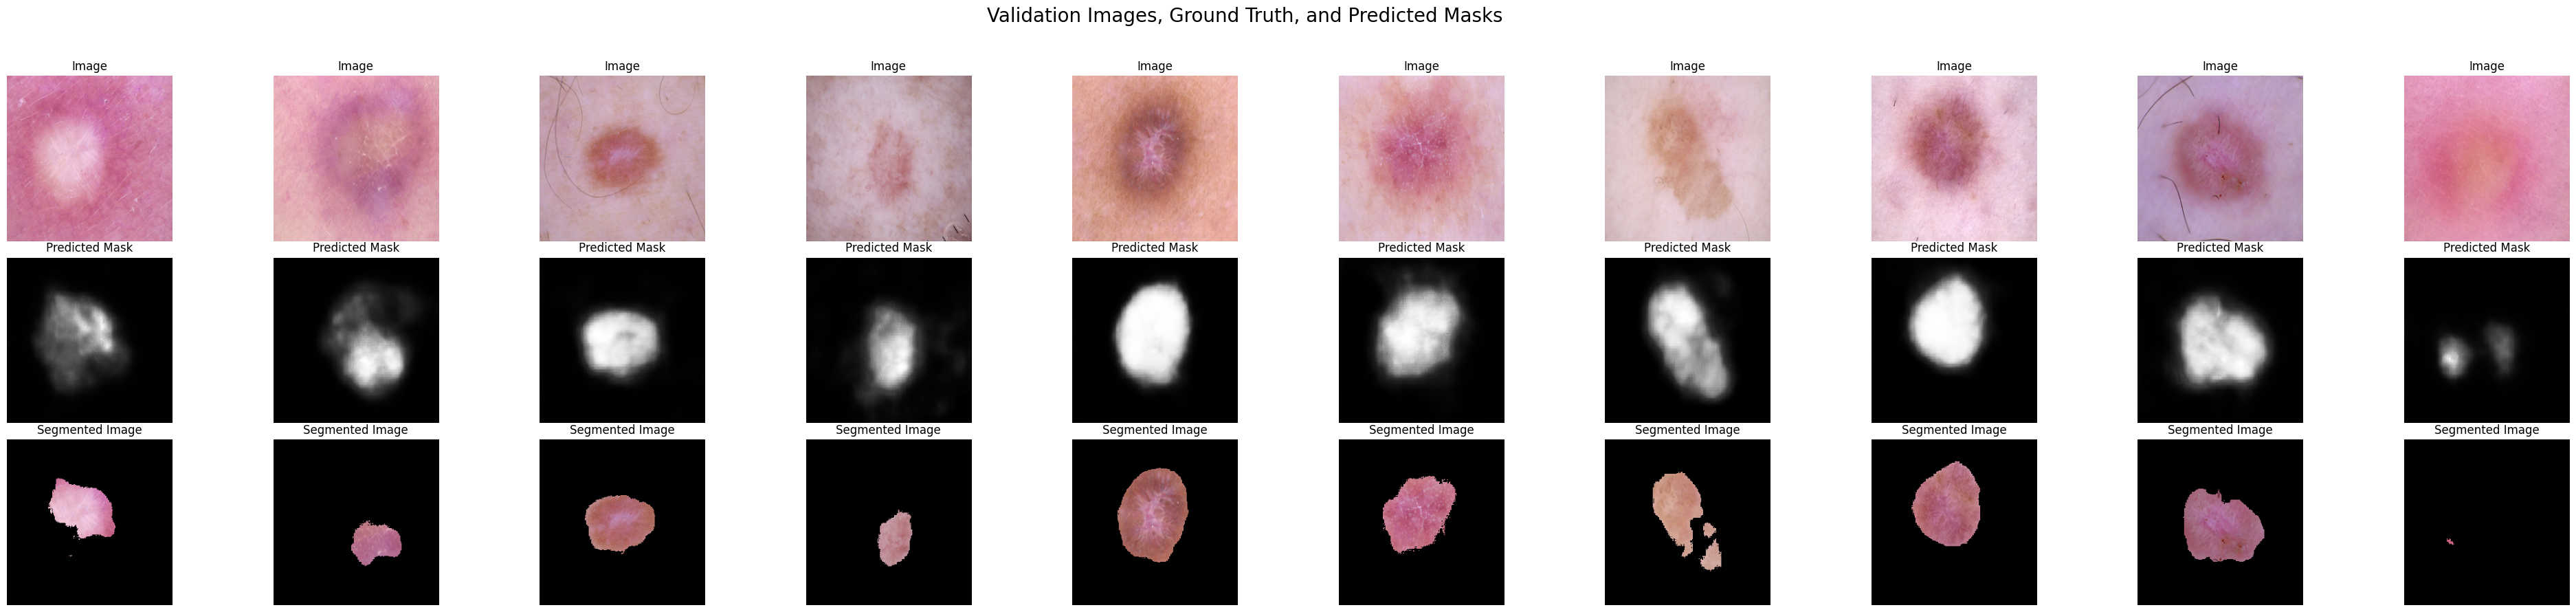

In [9]:
# Display validation images, ground truth masks, and predicted masks
display_validation_predictions(model, X_train, title="Validation Images, Ground Truth, and Predicted Masks")

In [173]:
def bulk_predict_and_save(model, images, output_dir):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    for i, image in enumerate(images):
        if i%100==0:
          print(f"Processing image {i+1}/{len(images)}")
        # Get the predicted mask
        pred_mask = model.predict(np.expand_dims(image, axis=0), verbose=0)[0, :, :, 0]
        # Create segmented image
        segmented_image = create_segmented_image(image, pred_mask)
        plt.imsave(os.path.join(output_dir, f'segmented_{i}.png'), segmented_image.astype(np.uint8))

    print(f"Predictions and segmented images saved in {output_dir}")

In [174]:
X_train = load_data("/content/original/akiec/")
# Perform bulk predictions and save
output_directory = '/content/segmented/akiec/'
bulk_predict_and_save(model, X_train, output_directory)


Processing image 1/327
Processing image 101/327
Processing image 201/327
Processing image 301/327
Predictions and segmented images saved in /content/segmented/akiec/


In [175]:
X_train = load_data("/content/original/bcc/")
# Perform bulk predictions and save
output_directory = '/content/segmented/bcc/'
bulk_predict_and_save(model, X_train, output_directory)


X_train = load_data("/content/original/bkl/")
# Perform bulk predictions and save
output_directory = '/content/segmented/bkl/'
bulk_predict_and_save(model, X_train, output_directory)


X_train = load_data("/content/original/df/")
# Perform bulk predictions and save
output_directory = '/content/segmented/df/'
bulk_predict_and_save(model, X_train, output_directory)

X_train = load_data("/content/original/mel/")
# Perform bulk predictions and save
output_directory = '/content/segmented/mel/'
bulk_predict_and_save(model, X_train, output_directory)


X_train = load_data("/content/original/vasc/")
# Perform bulk predictions and save
output_directory = '/content/segmented/vasc/'
bulk_predict_and_save(model, X_train, output_directory)


Processing image 1/514
Processing image 101/514
Processing image 201/514
Processing image 301/514
Processing image 401/514
Processing image 501/514
Predictions and segmented images saved in /content/segmented/bcc/
Processing image 1/1099
Processing image 101/1099
Processing image 201/1099
Processing image 301/1099
Processing image 401/1099
Processing image 501/1099
Processing image 601/1099
Processing image 701/1099
Processing image 801/1099
Processing image 901/1099
Processing image 1001/1099
Predictions and segmented images saved in /content/segmented/bkl/
Processing image 1/115
Processing image 101/115
Predictions and segmented images saved in /content/segmented/df/
Processing image 1/1113
Processing image 101/1113
Processing image 201/1113
Processing image 301/1113
Processing image 401/1113
Processing image 501/1113
Processing image 601/1113
Processing image 701/1113
Processing image 801/1113
Processing image 901/1113
Processing image 1001/1113
Processing image 1101/1113
Prediction

In [176]:
X_train = load_data("/content/original/nv/")
# Perform bulk predictions and save
output_directory = '/content/segmented/nv/'
bulk_predict_and_save(model, X_train, output_directory)

Processing image 1/6705
Processing image 101/6705
Processing image 201/6705
Processing image 301/6705
Processing image 401/6705
Processing image 501/6705
Processing image 601/6705
Processing image 701/6705
Processing image 801/6705
Processing image 901/6705
Processing image 1001/6705
Processing image 1101/6705
Processing image 1201/6705
Processing image 1301/6705
Processing image 1401/6705
Processing image 1501/6705
Processing image 1601/6705
Processing image 1701/6705
Processing image 1801/6705
Processing image 1901/6705
Processing image 2001/6705
Processing image 2101/6705
Processing image 2201/6705
Processing image 2301/6705
Processing image 2401/6705
Processing image 2501/6705
Processing image 2601/6705
Processing image 2701/6705
Processing image 2801/6705
Processing image 2901/6705
Processing image 3001/6705
Processing image 3101/6705
Processing image 3201/6705
Processing image 3301/6705
Processing image 3401/6705
Processing image 3501/6705
Processing image 3601/6705
Processing im